In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df5 = pd.read_csv('../Data/Internal_Reflection_Test/Tables/f_vs_vlockin_intref2_14p154.csv')
df7 = pd.read_csv('../Data/Internal_Reflection_Test/Tables/f_vs_vlockin_intref2_19p234.csv')
df9 = pd.read_csv('../Data/Internal_Reflection_Test/Tables/f_vs_vlockin_intref2_24p314.csv')

In [4]:
df5['Vlockin Normalized'] = df5['Vlockin (microvolts)'] * 200.335716
df7['Vlockin Normalized'] = df7['Vlockin (microvolts)'] * 369.946756
df9['Vlockin Normalized'] = df9['Vlockin (microvolts)'] * 591.170596

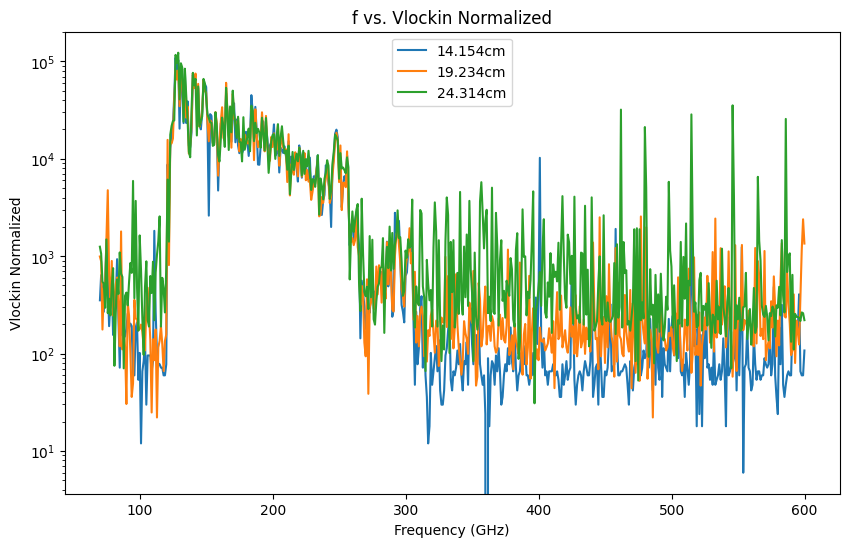

In [9]:
plt.figure(figsize = (10, 6))
plt.plot(df5['Measured Frequency (GHz)'], df5['Vlockin Normalized'], label = '14.154cm')
plt.plot(df7['Measured Frequency (GHz)'], df7['Vlockin Normalized'], label = '19.234cm')
plt.plot(df9['Measured Frequency (GHz)'], df9['Vlockin Normalized'], label = '24.314cm')
plt.yscale('log')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Vlockin Normalized')
plt.title('f vs. Vlockin Normalized')
plt.legend()
plt.savefig('../Data/Internal_Reflection_Test/Plots/f_vs_vlockin_normalized_combined.png')
plt.show()

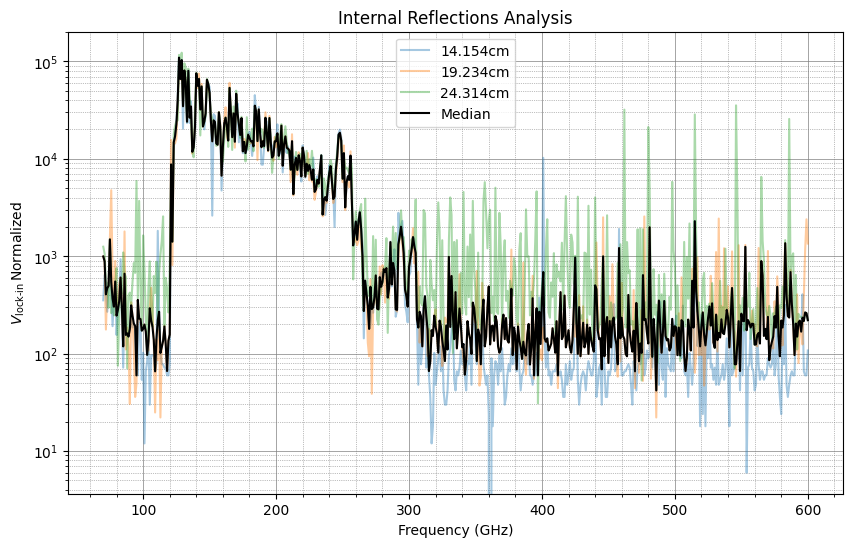

In [19]:
df_combined = pd.concat([df5[['Desired Frequency (GHz)', 'Vlockin Normalized']],
                         df7[['Desired Frequency (GHz)', 'Vlockin Normalized']],
                         df9[['Desired Frequency (GHz)', 'Vlockin Normalized']]])
median_df = df_combined.groupby('Desired Frequency (GHz)')['Vlockin Normalized'].median().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df5['Desired Frequency (GHz)'], df5['Vlockin Normalized'], label='14.154cm', alpha = 0.4)
plt.plot(df7['Desired Frequency (GHz)'], df7['Vlockin Normalized'], label='19.234cm', alpha = 0.4)
plt.plot(df9['Desired Frequency (GHz)'], df9['Vlockin Normalized'], label='24.314cm', alpha = 0.4)
plt.plot(median_df['Desired Frequency (GHz)'], median_df['Vlockin Normalized'], label='Median', color='black')
plt.yscale('log')
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$V_{\mathrm{lock\text{-}in}} \, \mathrm{Normalized}$')
plt.title('Internal Reflections Analysis')
plt.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.legend()
plt.savefig('../Data/Internal_Reflection_Test/Plots/f_vs_vlockin_normalized_median.png')
plt.show()